Part 0: Imports

Part 1: Visualize, break up data

Part 2: Feature Engineer

Part 2.5: Scaling Data

Part 3: Modeling

# ----- Importing -----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


train = pd.read_csv ('C:/Users/mitch_ue52/Documents/Kaggle/Titanic/train.csv')
test = pd.read_csv ('C:/Users/mitch_ue52/Documents/Kaggle/Titanic/test.csv')

# ----- Visualizing and Breaking up Data -----

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]

In [4]:
df_cat = train[['Sex', 'Embarked', 'Cabin', 'Pclass']]

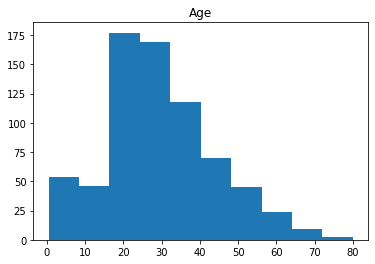

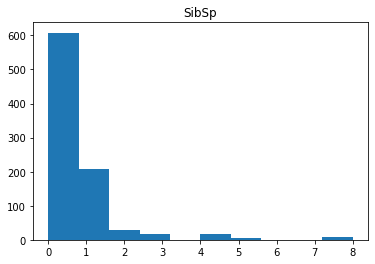

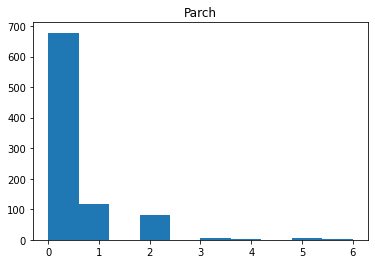

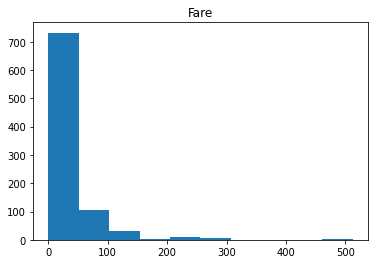

In [5]:
for x in df_num.columns:
    plt.hist(df_num[x])
    plt.title(x)
    plt.show()

In [6]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [7]:
print(df_num.drop(['SibSp', 'Parch'], axis=1).corr())

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


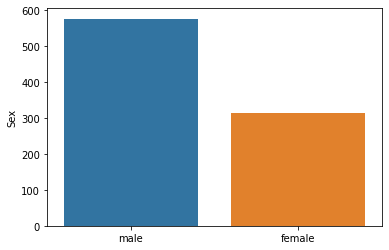

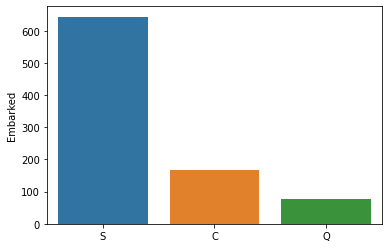

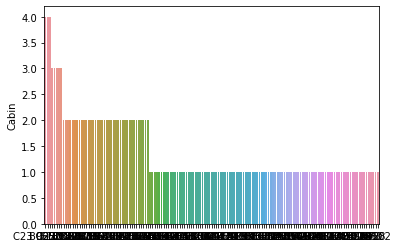

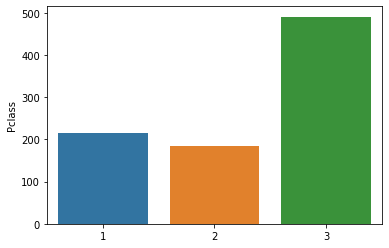

In [8]:
for i in df_cat.columns:
    x = df_cat[i].value_counts().index
    y = df_cat[i].value_counts()
    sns.barplot(x=x, y=y)
    plt.show()

In [9]:
df_cat['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [10]:
for column in df_num:
    print('\033[1m' + column + '\033[0m')
    print(df_num[column].value_counts())
    print('\n ---------------------------------------------------------------------')
    
for column in df_cat:
    print('\033[1m' + column + '\033[0m')
    print(df_cat[column].value_counts())
    print('\n ---------------------------------------------------------------------')

Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

 ---------------------------------------------------------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

 ---------------------------------------------------------------------
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

 ---------------------------------------------------------------------
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

 ---------------------------------------------------------------------
Sex
male      577
female    314
Name: Sex, dtype: int64

 ---------------------------------------------------------------------
Embarked
S    644
C    16

In [11]:
import math


age_column = train.loc[:,'Age']
ages = [x for x in age_column.values if math.isnan(x) == False]

stat, p = stats.shapiro(ages)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')


Statistics=0.981, p=0.000
Sample does not look Gaussian


# ----- FEATURE ENGINEERING -----

In [12]:
def fe_data(df):
    print('start feature engineering')
    
    
    df['Family'] =df['SibSp'] + df['Parch']
    df.drop(columns = ['SibSp', 'Parch'], inplace = True)
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)
    df.dropna(subset = ['Embarked'], inplace=True)
    df = pd.get_dummies(df, columns = ['Embarked'], prefix = ['Emb'])
    df = pd.get_dummies(df, columns = ['Pclass'], prefix = ['Class'])
    df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)
   
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    
    print('finished feature engineering')
    
    return df

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ----- Scaling Data -----

In [14]:
def scale_data(df):
    scale = StandardScaler()
    x_train = train.copy()
    x_train[['Fare', 'Age']] = scale.fit_transform(x_train[['Fare', 'Age']])
    x_train.drop(columns = 'Survived', inplace = True)
    return df

# ----- Modeling -----


In [15]:
gnb = GaussianNB()
lr = LogisticRegression(max_iter=1000)
dt = tree.DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
kn = KNeighborsClassifier()
svc = SVC(probability=True)

train = fe_data(train)
train = scale_data(train)

x_train = train.drop(columns='Survived', inplace = False)
y_train = train['Survived'].copy()


x_test = fe_data(test)
x_test = scale_data(x_test)

Models = [gnb, lr, dt, rf, kn, svc]

for model in Models:
    cv = cross_val_score(model, x_train, y_train, cv=5)
    print('\033[1m',model, '\033[0m')
    print(cv, '\n')
    print(round(cv.mean(), 3))
    print('----------------------------------------', '\n\n')



start feature engineering
finished feature engineering
start feature engineering
finished feature engineering
 GaussianNB() 
[0.64606742 0.73595506 0.79775281 0.81460674 0.81355932] 

0.762
---------------------------------------- 


 LogisticRegression(max_iter=1000) 
[0.78089888 0.80337079 0.78651685 0.78089888 0.81920904] 

0.794
---------------------------------------- 


 DecisionTreeClassifier(random_state=0) 
[0.60674157 0.76404494 0.79213483 0.7752809  0.81355932] 

0.75
---------------------------------------- 


 RandomForestClassifier(random_state=0) 
[0.73595506 0.79775281 0.84831461 0.82022472 0.84180791] 

0.809
---------------------------------------- 


 KNeighborsClassifier() 
[0.62359551 0.44382022 0.47752809 0.47752809 0.68361582] 

0.541
---------------------------------------- 


 SVC(probability=True) 
[0.61797753 0.64044944 0.64606742 0.64044944 0.65536723] 

0.64
---------------------------------------- 




In [16]:
vc_soft = VotingClassifier(estimators = [('gnb', gnb), ('lr', lr), ('dt', dt), ('rf', rf), ('kn', kn), ('svc', svc)], voting= 'soft')
vc_hard = VotingClassifier(estimators = [('gnb', gnb), ('lr', lr), ('dt', dt), ('rf', rf), ('kn', kn), ('svc', svc)], voting= 'hard')

cv1 = cross_val_score(vc_soft, x_train, y_train, cv=5)
cv2 = cross_val_score(vc_hard, x_train, y_train, cv=5)

print(cv1)
print(cv1.mean())

print(cv2)
print(cv2.mean())

[0.65168539 0.76966292 0.84831461 0.78089888 0.84180791]
0.7784739414714658
[0.62359551 0.79775281 0.82022472 0.80337079 0.81920904]
0.7728305719545483


In [17]:
vc_hard = vc_hard.fit(x_train, y_train)

y_hat = vc_hard.predict(x_test).astype(int)

final_data = {'PassengerId': x_test.PassengerId, 'Survived': y_hat}
submission = pd.DataFrame(data = final_data)
submission.to_csv('submisson_MT.csv', index =False)